This code is exploring the construction of a bimodal (two-Gaussian) pdf

In [110]:
# Generic imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma

In [111]:
# Graphics
%matplotlib notebook

In [112]:
# Here's a Weibull function
def pWeibull(r, sigma, eta):
    ''' Weibull function '''
    from numpy import exp
    mu = 1-r
    ret = 2*eta/sigma**2/mu**3 * \
        (((mu**(-2)-1)/sigma**2)**(eta-1)) * \
        exp(-((mu**(-2)-1)/sigma**2)**eta)
    return ret

In [113]:
# Lay out a range of r-values we want to evaluate the PDF at
rminforhist = 1e-6
rmaxforhist = .99999
numforhist = 100
rvals=np.geomspace(rminforhist,rmaxforhist,numforhist)
xvals = np.log(rvals)

Getting a Gaussian PDF

<IPython.core.display.Javascript object>


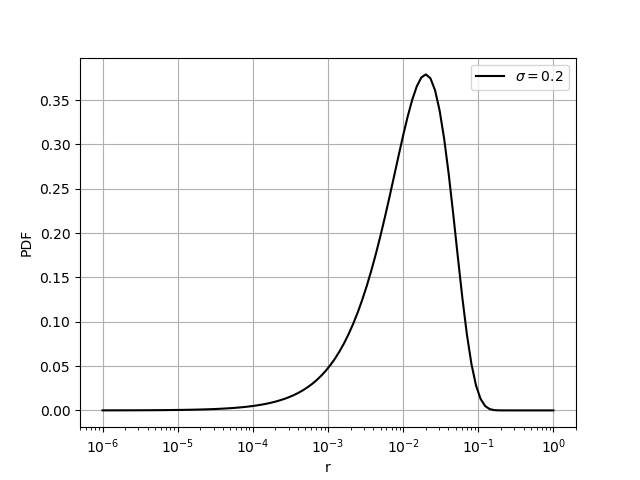

Area = 0.9992591770036596


In [114]:
# Specify parameters
eta1 = 1.0
sigma1 = 0.2

# Calculate the PDF
pdf1 = rvals*pWeibull(rvals, sigma1, eta1)

# Plot it
plt.figure()
plt.semilogx(rvals,pdf1,'k-',label=r'$\sigma=$'+str(sigma1))
plt.xlabel('r')
plt.ylabel('PDF')
plt.grid(True)
plt.legend()

# Testing the normalization
numerical_integral = -np.trapz(xvals,pdf1); print ('Area =', numerical_integral)

Getting another Gaussian PDF

<IPython.core.display.Javascript object>


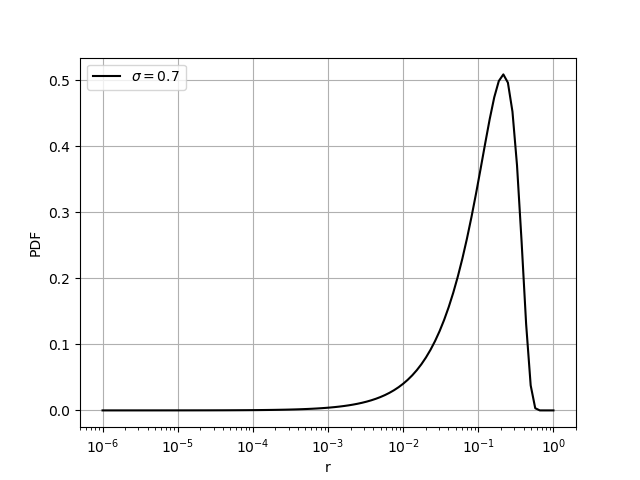

Area = 0.9999392763840214


In [115]:
# Specify parameters (different from previous)
eta2= 1.0
sigma2= 0.7

# Calculate the PDF
pdf2 = rvals*pWeibull(rvals, sigma2, eta2)

# Plot it
plt.figure()
plt.semilogx(rvals,pdf2,'k-',label=r'$\sigma=$'+str(sigma2))
plt.xlabel('r')
plt.ylabel('PDF')
plt.grid(True)
plt.legend()

# Testing the normalization
numerical_integral = -np.trapz(xvals,pdf2); print ('Area =', numerical_integral)        

Getting the weighted sum of these two Gaussian PDFs

<IPython.core.display.Javascript object>


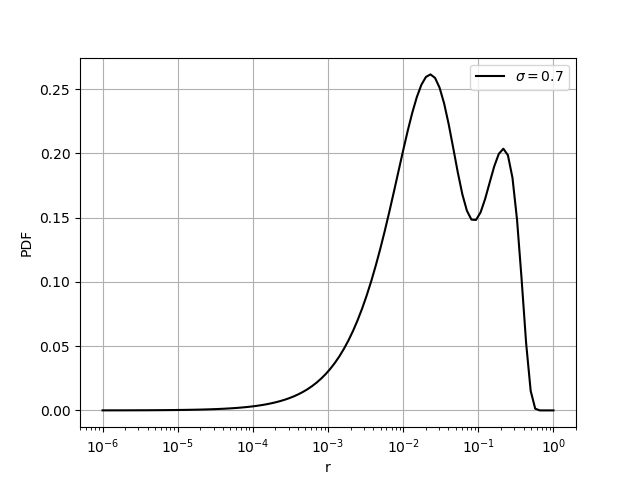

In [116]:
# Add the PDFs to make a new combination 
N = 0.4 # 0<N<1
added = (1-N)*(rvals*pWeibull(rvals, sigma1, eta1)) + N*(rvals*pWeibull(rvals, sigma2, eta2))
# Plot the combined PDF
plt.figure()
plt.semilogx(rvals,added,'k-',label=r'$\sigma=$'+str(sigma2))
plt.xlabel('r')
plt.ylabel('PDF')
plt.grid(True)
plt.legend()  

In [117]:
# Just testing
xvals = np.log(rvals)
Zsquarvals = 1/(1-rvals)**2-1 #print (Zsquarvals)
Z4vals = Zsquarvals**2
# mean_Zsquar = -np.trapz(rvals, pWeibull(rvals, sigma2, eta2)*Zsquarvals) ;print(mean_Zsquar)
# mean_Z4 = -np.trapz (rvals, pWeibull(rvals, sigma2, eta2)*Z4vals) 

mean_Zsquar = -np.trapz(xvals, pdf1*Zsquarvals) ;print(mean_Zsquar)
mean_Z4 = -np.trapz (xvals, pdf1*Z4vals) 

std_devsquar = mean_Z4 - mean_Zsquar**2 
sigma_test = std_devsquar**.25
print('This is sigma = ', sigma_test)


0.03999999856818924
This is sigma =  0.20000000357943906


In [118]:
#characterizing our constructed pdf
mean_Zsquar = -np.trapz(xvals, added*Zsquarvals) ;print(mean_Zsquar)
mean_Z4 = -np.trapz (xvals, added*Z4vals)
std_devsquar = mean_Z4 - mean_Zsquar**2 ;print(std_devsquar**0.5)
sigma = std_devsquar**0.25
print('sigma estimated from obs =',sigma)



0.21999978176747903
0.3815785235013012
sigma estimated from obs = 0.6177204250316654


Eta estimated from obs = 0.6025396860216731
sigmaW estimated from obs = 0.3834371979156147


<IPython.core.display.Javascript object>


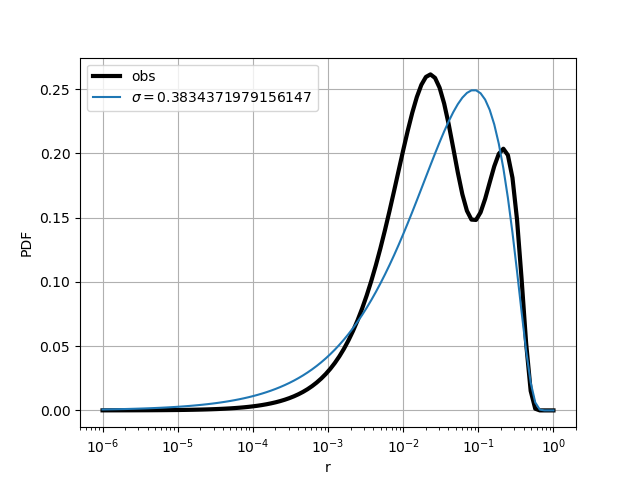

In [119]:
# Eta using Eq. 12
etaW = mean_Zsquar/sigma**2 + ((np.pi**2 - 9)/6)*(1-(mean_Zsquar/sigma**2))**2
print('Eta estimated from obs =', etaW)

# SigmaW using Eq. 13
sigmaW = (mean_Zsquar/gamma(1/etaW+1))**0.5
print('sigmaW estimated from obs =',sigmaW)

# Graphics
plt.figure()
plt.semilogx(rvals,added,'k-',label='obs',linewidth=3)
plt.semilogx(rvals, pWeibull(rvals, sigmaW, etaW)*rvals, label=r'$\sigma=$'+str(sigmaW))
plt.xlabel('r')
plt.ylabel('PDF')
plt.grid(True)
plt.legend()  